# THP1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


library import

In [7]:
import os #importando biblioteca de organização de arquivos
import joblib #convertendo imagens em valores numéricos .gz
import numpy as np #estruturação de dados
import matplotlib.pyplot as plt #plotagem de gráficos 
import matplotlib.image as mpimg #plotagem de imagens
# from util import meus_uteis, timeProcess
from PIL import Image
from util import meus_uteis, timeProcess
import pandas as pd




Organizing images into folders/ 106 brightfield images of the THP1 lineage are being saved

In [8]:
novas_imagens = '/content/drive/MyDrive/Imagens_doc_linhagens/5_Imagens_mAb_Macrofagos_THP1_30_09_22_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(novas_imagens) #listando as figuras salvas no diretório
len(lista_novas_img) #quantidade de imagens


106

View images in 200x200 size

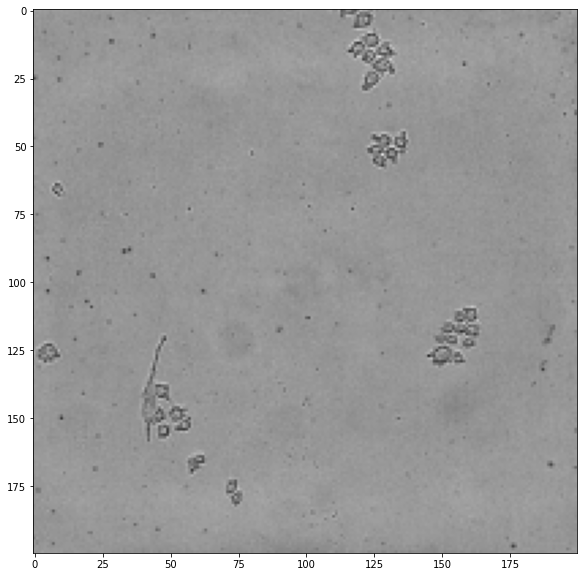

In [9]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### y = labels (106)

In [10]:
#Salvando os rótulos da imgem em uma lista
y_rotulo_imagem = [n.split('campo_claro_')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [(n.split('.png')[0]) for n in y_rotulo_imagem]
len(y_rotulo_imagem)
#y_rotulo_imagem = y_rotulo_imagem[:44]
# len(y_rotulo_imagem) #verificando o numero de rótulos corresponde o numero de imagens
#y_rotulo_imagem

106

In [11]:
# y_rotulo_imagem.sort()
# print(y_rotulo_imagem)

In [12]:
#dados estatísticos do conjunto de imagens
# df = pd.DataFrame(y_rotulo_imagem)
# df.describe()

In [13]:
#testando se cortou apenas os valores de rótulo
#y_rotulo_imagem

Formatting all images that are saved in the directory into an array

In [14]:
lista_imagens_camp_claro = [] #lista vazia onde vai ser armazenado os dados
for file in lista_novas_img:  #laço pra salvar todas as imagens
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test) #abrir a imagem
    img = img.resize(resize_img) #formatando em 200x200
    img = np.asarray(img)[:,:,:3] #formatando em array
    lista_imagens_camp_claro.append(img)  #adicionando cada imagem
np.asarray(lista_imagens_camp_claro).shape #verificando quantas imagens foram salvas em qual tamnho e camadas

(106, 200, 200, 3)

Once the images were saved, we only got 112 images, to increase the image bank, the same images were saved in different directions. In this case, saving the images by flipping from left to right.

### y = label (212 - doubled)

In [15]:
#dobrando o numero de rótulos - mesmo que a imagem esteja invertida, ela possui mesmo rótulo
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

212

## Saving inverted images from left to right

In [16]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(212, 200, 200, 3)

In [17]:
# #conferindo a imagem
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*1)])
# plt.show()

## Saving inverted images from bottom to topa

Saving 106 more images by reversing the orientation.

### y = label (318- doubled)

In [18]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

318

In [19]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(318, 200, 200, 3)

In [20]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*2)])
# plt.show()

### Saving inverted images from top to bottom

### y = rótulo (424 - dobrou)

In [21]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

424

In [22]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)    
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(424, 200, 200, 3)

In [23]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*3)])
# plt.show()

In [24]:
# lista_imagens_camp_claro

In [25]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_100_resized_class_THP1-'+data+'.gz')

['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_100_resized_class_THP1-2023-3-14.gz']

In [26]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_100_resized_class_THP1-'+data+'.gz')


['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_100_resized_class_THP1-2023-3-14.gz']

Cropping 75% of the image/enlarging the image bank

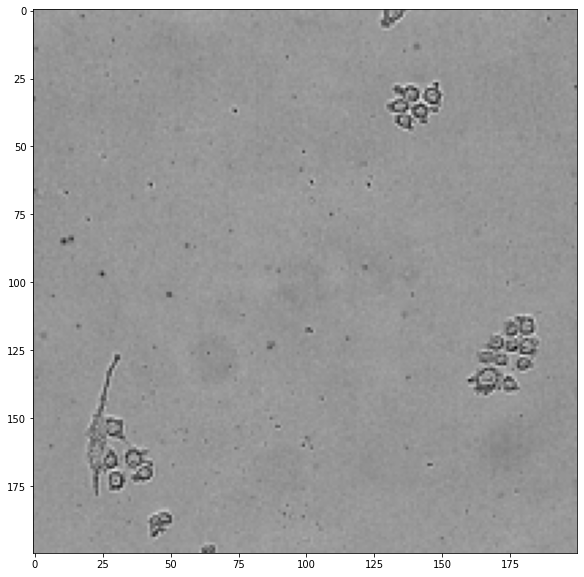

In [27]:
box = (135,135,945,945)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [28]:
from math import ceil


In [29]:
y_rotulo_imagem = [n.split('campo_claro_')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [(n.split('.png')[0]) for n in y_rotulo_imagem]
#y_rotulo_imagem = [ceil(n-(n*0.25)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

106

In [30]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(106, 200, 200, 3)

## crop images 75% resized and rotating from left to right




In [31]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

212

In [32]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(212, 200, 200, 3)

## crop image 75% resized and flipping from bottom to top


In [33]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

318

In [34]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(318, 200, 200, 3)

## Saving crop 75% resized and flip top bottom image

In [35]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

424

In [36]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(424, 200, 200, 3)

In [37]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_75_resized_class_THP1-'+data+'.gz')

['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_75_resized_class_THP1-2023-3-14.gz']

In [38]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_75_resized_class_THP1-'+data+'.gz')


['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_75_resized_class_THP1-2023-3-14.gz']

## Crop 50% of the image

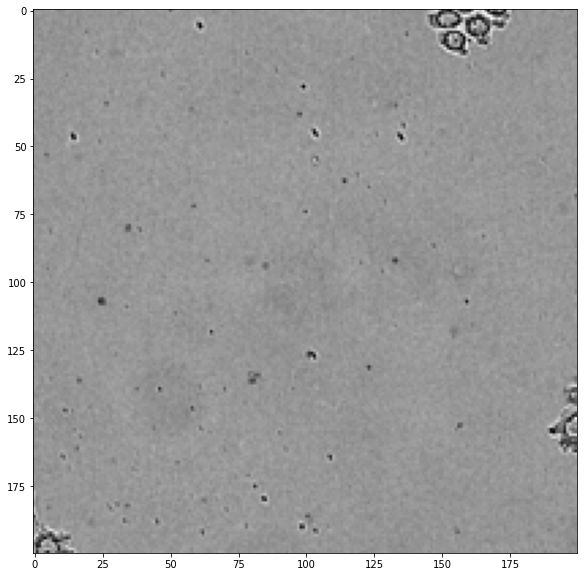

In [39]:
box = (270,270,810,810)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [40]:
y_rotulo_imagem = [n.split('campo_claro_')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [(n.split('.png')[0]) for n in y_rotulo_imagem]
#y_rotulo_imagem = [ceil(n/2) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

106

In [41]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(106, 200, 200, 3)

## Saving crop 50% resized and turn image left right

In [42]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

212

In [43]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(212, 200, 200, 3)

## Saving 50% resized crop and flip top bottom image

In [44]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

318

In [45]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(318, 200, 200, 3)

## Saving crop 50% resized and flip top bottom image

In [46]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

424

In [47]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(424, 200, 200, 3)

In [48]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_50_resized_class_THP1-'+data+'.gz')

['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_50_resized_class_THP1-2023-3-14.gz']

In [49]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_50_resized_class_THP1-'+data+'.gz')


['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_50_resized_class_THP1-2023-3-14.gz']

## Crop 25% of the image

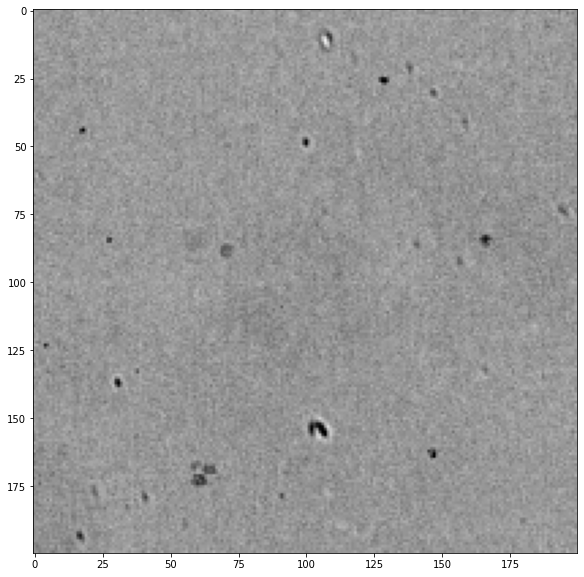

In [50]:
box = (405,405,675,675)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [51]:
y_rotulo_imagem = [n.split('campo_claro_')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [(n.split('.png')[0]) for n in y_rotulo_imagem]
#y_rotulo_imagem = [ceil(n-(n*0.75)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

106

In [52]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(106, 200, 200, 3)

## Saving crop 25% resized and turn image left right

In [53]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

212

In [54]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(212, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [55]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

318

In [56]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(318, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [57]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

424

In [58]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(424, 200, 200, 3)

In [59]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_25_resized_class_THP1-'+data+'.gz')

['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_img_camp_clar_25_resized_class_THP1-2023-3-14.gz']

In [60]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_25_resized_class_THP1-'+data+'.gz')


['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imag_rot_linhagens_para_orga_14_03_23/lista_rotulos_camp_clar_25_resized_class_THP1-2023-3-14.gz']